# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
con = sqlite3.connect("db\Market.db")

# TODO: Set up the cursor
cursor = con.cursor()
cursor.execute("SELECT * FROM Customers")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\since\AppData\Local\Temp\ipykernel_37464\1736118596.py:2: SyntaxWarning: invalid escape sequence '\M'
  con = sqlite3.connect("db\Market.db")


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# TODO: Write a SQL query which will answer the question above.
# Calculate the number of products that cost less than $10 in the Products table
cursor.execute("""SELECT COUNT(ProductID) as totalproducts_under10 FROM Products
    WHERE price < 10;
""")


rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
# Identify the most frequent countries in the Supplier table
cursor.execute("""SELECT DISTINCT Country, COUNT(SupplierID) as supplier_count FROM Suppliers
               GROUP BY Country
               ORDER BY supplier_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
supplier_country = cursor.fetchall()
print(supplier_country)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  SupplierCount
0           USA              4
1       Germany              3
2        France              3
3            UK              2
4        Sweden              2
5         Japan              2
6         Italy              2
7        Canada              2
8     Australia              2
9         Spain              1
10    Singapore              1
11       Norway              1
12  Netherlands              1
13      Finland              1
14      Denmark              1
15       Brazil              1


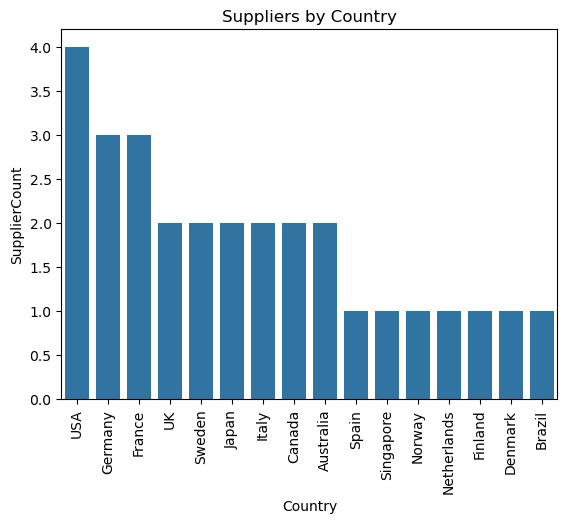

<Figure size 1500x480 with 0 Axes>

In [14]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=supplier_country, columns=['Country', 'SupplierCount'])
print(df)
# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x="Country", y="SupplierCount")
plt.title("Suppliers by Country")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 4.8))
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [16]:
# TODO: Write a SQL query which will answer the question above.
# Group the customers by country, count the number of customers in each group,
# and orders the results in descending order based on the customer count.
cursor.execute("""SELECT DISTINCT Country, COUNT(CustomerID) as customercountry_count FROM Customers
               GROUP BY Country
               ORDER BY customercountry_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
customer_country = cursor.fetchall()
print(customer_country)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


        Country  CustomerCount
0           USA             13
1       Germany             11
2        France             11
3        Brazil              9
4            UK              7
5         Spain              5
6        Mexico              5
7     Venezuela              4
8         Italy              3
9        Canada              3
10    Argentina              3
11  Switzerland              2
12       Sweden              2
13     Portugal              2
14      Finland              2
15      Denmark              2
16      Belgium              2
17      Austria              2
18       Poland              1
19       Norway              1
20      Ireland              1


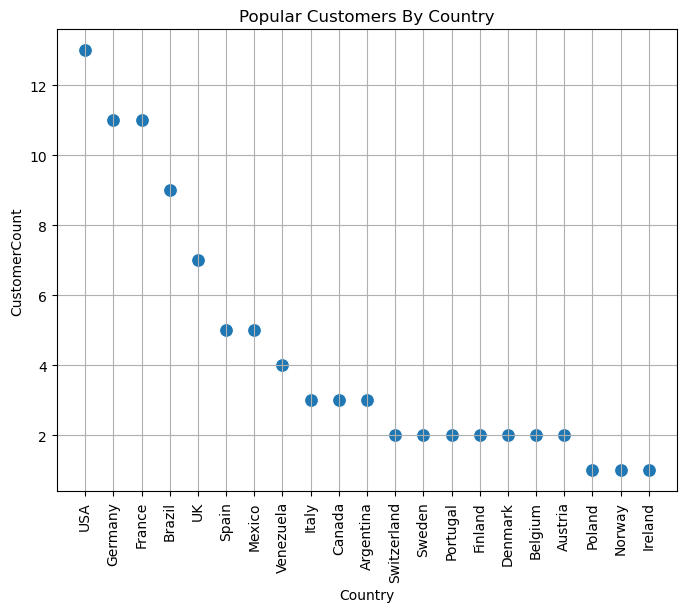

In [21]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=customer_country, columns=['Country', 'CustomerCount'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Country', y='CustomerCount', data=df, s=100) # s controls marker size
plt.title('Popular Customers By Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('CustomerCount')
plt.grid(True)
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [35]:
# TODO: Write a SQL query which will answer the question above.
#Join products with order details table, select product ID, name, and quantity
# Order the product quantity (ascending) and limit to the first 20 products.
cursor.execute("""SELECT DISTINCT p.ProductName, o.ProductID, o.Quantity  
               FROM Products as p INNER JOIN OrderDetails as o
               ON p.ProductID = o.ProductID
               ORDER BY Quantity ASC
               LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
product_count = cursor.fetchall()
print(product_count)

[('Gravad lax', 37, 1), ('Teatime Chocolate Biscuits', 19, 1), ('Gudbrandsdalsost', 69, 1), ('Gnocchi di nonna Alice', 56, 2), ('Ravioli Angelo', 57, 2), ('Manjimup Dried Apples', 51, 2), ('Fløtemysost', 71, 2), ('Singaporean Hokkien Fried Mee', 42, 2), ('Boston Crab Meat', 40, 2), ('Alice Mutton', 17, 2), ('Spegesild', 46, 2), ('Konbu', 13, 2), ('Gumbär Gummibärchen', 26, 2), ('Mozzarella di Giovanni', 72, 3), ('Scottish Longbreads', 68, 3), ('Fløtemysost', 71, 3), ('Mozzarella di Giovanni', 72, 4), ('Steeleye Stout', 35, 4), ('Gnocchi di nonna Alice', 56, 4), ('Rössle Sauerkraut', 28, 4)]


                      ProductName  ProductID  Quantity
0                      Gravad lax         37         1
1      Teatime Chocolate Biscuits         19         1
2                Gudbrandsdalsost         69         1
3          Gnocchi di nonna Alice         56         2
4                  Ravioli Angelo         57         2
5           Manjimup Dried Apples         51         2
6                     Fløtemysost         71         2
7   Singaporean Hokkien Fried Mee         42         2
8                Boston Crab Meat         40         2
9                    Alice Mutton         17         2
10                      Spegesild         46         2
11                          Konbu         13         2
12            Gumbär Gummibärchen         26         2
13         Mozzarella di Giovanni         72         3
14            Scottish Longbreads         68         3
15                    Fløtemysost         71         3
16         Mozzarella di Giovanni         72         4
17        

Text(0.5, 1.0, 'Quantity Sum by Product')

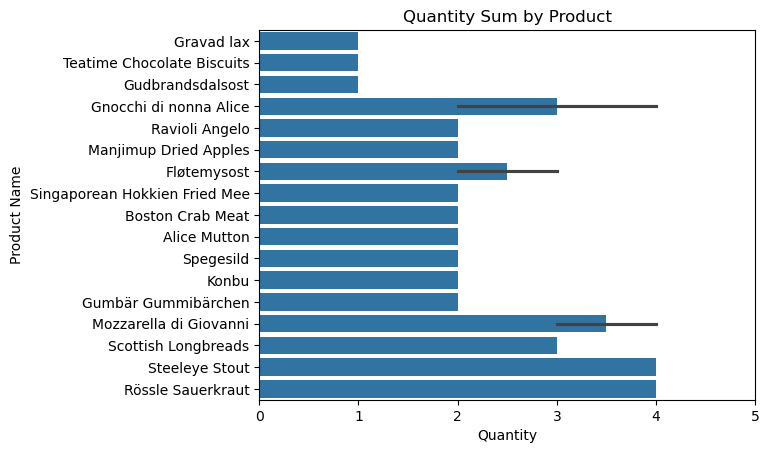

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=product_count, columns=[ 'ProductName','ProductID', 'Quantity'])
print(df)

# TODO: Generate a visualization on this dataframe
sns.barplot(x='Quantity', y='ProductName', data=df, orient='h') 
plt.ylabel('Product Name')
plt.xlabel('Quantity')
plt.xticks([0,1,2,3,4,5])
plt.title('Quantity Sum by Product')


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [43]:
# TODO: Write a SQL query which will answer the question above.
# Join Products and OrderDetails tables, calculate the revenue per product,
# order product by revenue (ascending) to find the smallest revenue items, and limit to 20 results.
cursor.execute("""SELECT o.ProductID, p.ProductName, p.price, o.Quantity, o.Quantity * p.Price as total_revenue  
               FROM Products as p INNER JOIN OrderDetails as o
               ON p.ProductID = o.ProductID
               ORDER BY total_revenue ASC
               LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
product_revcount = cursor.fetchall()
print(product_revcount)

[(19, 'Teatime Chocolate Biscuits', 9.2, 1, 9.2), (13, 'Konbu', 6, 2, 12), (33, 'Geitost', 2.5, 8, 20.0), (46, 'Spegesild', 12, 2, 24), (37, 'Gravad lax', 26, 1, 26), (24, 'Guaraná Fantástica', 4.5, 6, 27.0), (42, 'Singaporean Hokkien Fried Mee', 14, 2, 28), (69, 'Gudbrandsdalsost', 36, 1, 36), (40, 'Boston Crab Meat', 18.4, 2, 36.8), (19, 'Teatime Chocolate Biscuits', 9.2, 4, 36.8), (54, 'Tourtière', 7.45, 5, 37.25), (68, 'Scottish Longbreads', 12.5, 3, 37.5), (68, 'Scottish Longbreads', 12.5, 3, 37.5), (57, 'Ravioli Angelo', 19.5, 2, 39.0), (71, 'Fløtemysost', 21.5, 2, 43.0), (54, 'Tourtière', 7.45, 6, 44.7), (24, 'Guaraná Fantástica', 4.5, 10, 45.0), (24, 'Guaraná Fantástica', 4.5, 10, 45.0), (24, 'Guaraná Fantástica', 4.5, 10, 45.0), (75, 'Rhönbräu Klosterbier', 7.75, 6, 46.5)]


    ProductID                    ProductName  Quantity  Price  TotalRevenue
0          19     Teatime Chocolate Biscuits      9.20      1          9.20
1          13                          Konbu      6.00      2         12.00
2          33                        Geitost      2.50      8         20.00
3          46                      Spegesild     12.00      2         24.00
4          37                     Gravad lax     26.00      1         26.00
5          24             Guaraná Fantástica      4.50      6         27.00
6          42  Singaporean Hokkien Fried Mee     14.00      2         28.00
7          69               Gudbrandsdalsost     36.00      1         36.00
8          40               Boston Crab Meat     18.40      2         36.80
9          19     Teatime Chocolate Biscuits      9.20      4         36.80
10         54                      Tourtière      7.45      5         37.25
11         68            Scottish Longbreads     12.50      3         37.50
12         6

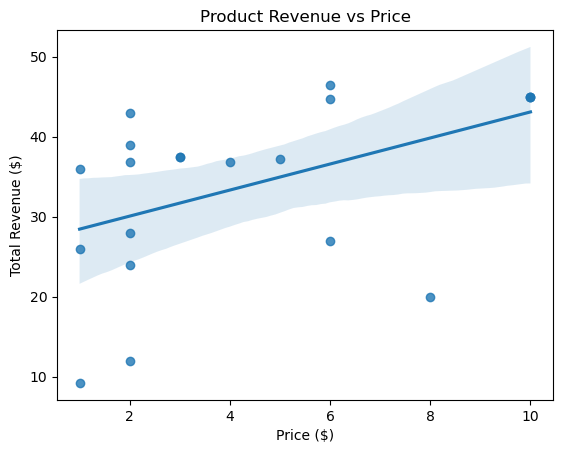

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=product_revcount, columns=['ProductID', 'ProductName', 'Quantity', 'Price', 'TotalRevenue'])
print(df)

# TODO: Generate a visualization on this dataframe
#Plot linear regression fit 
sns.regplot(x= 'Price', y='TotalRevenue', data=df)
plt.xlabel('Price ($)')
plt.ylabel('Total Revenue ($)')
plt.title('Product Revenue vs Price')
plt.show()

In [57]:
#Bivariate Pearson Correlation for reationship between Total Revenue and Price
rev_price = df[["TotalRevenue", "Price"]].corr()
rev_price

,TotalRevenue,Price
TotalRevenue,1.000000,0.462191
Price,0.462191,1.000000


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [61]:
# TODO: Write a SQL query which will answer the question above.
# Join three tables—Customers, Orders, OrderDetails—group by customer country,
# and then order results by total quantity (descending)
cursor.execute("""SELECT c.Country, od.Quantity  
               FROM Customers as c INNER JOIN Orders as o
               ON c.CustomerID = o.CustomerID
               JOIN OrderDetails as od ON o.OrderID = od.OrderID
               GROUP BY Country
               ORDER BY Quantity DESC;
""")

# TODO: Fetch your list of tuples and print it out
country_ordercount = cursor.fetchall()
print(country_ordercount)

[('Germany', 50), ('Austria', 50), ('Ireland', 40), ('Canada', 40), ('Belgium', 40), ('Sweden', 35), ('UK', 30), ('Poland', 30), ('Venezuela', 25), ('USA', 16), ('Switzerland', 15), ('Norway', 15), ('Italy', 12), ('Finland', 12), ('Argentina', 12), ('Mexico', 10), ('Portugal', 9), ('Brazil', 9), ('Denmark', 8), ('France', 6), ('Spain', 1)]


        Country  OrderQuantity
0       Germany             50
1       Austria             50
2       Ireland             40
3        Canada             40
4       Belgium             40
5        Sweden             35
6            UK             30
7        Poland             30
8     Venezuela             25
9           USA             16
10  Switzerland             15
11       Norway             15
12        Italy             12
13      Finland             12
14    Argentina             12
15       Mexico             10
16     Portugal              9
17       Brazil              9
18      Denmark              8
19       France              6
20        Spain              1


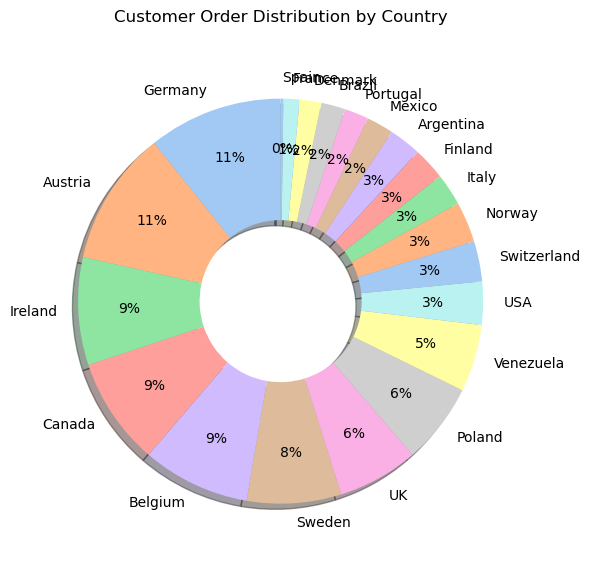

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=country_ordercount, columns=['Country', 'OrderQuantity'])
print(df)

# TODO: Generate a visualization on this dataframe
# Set Country as the index for the pie chart
df.set_index('Country', inplace=True)


# Select color for pie chart
colors = sns.color_palette('pastel', len(df))

# Plot a pie chart 
ax = df['OrderQuantity'].plot.pie(
    figsize=(6, 6),
    labels=df.index,
    autopct='%.0f%%',
    colors=colors,
    pctdistance=0.75,
    labeldistance=1.1,
    startangle=90,
    shadow=True,
    wedgeprops=dict(width=0.6),
    legend=False
)

ax.set_ylabel('') 
ax.set_title('Customer Order Distribution by Country')
ax.axis('equal') 
plt.tight_layout()
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
# Use LEFT JOIN from Customers to Orders tables, filter for customers with null orders,
# then group the results by country to count such null values.
cursor.execute("""SELECT c.Country, COUNT(c.CustomerID)
               FROM Customers as c LEFT JOIN Orders as o
               ON c.CustomerID = o.CustomerID
               WHERE o.CustomerID IS NULL
               GROUP BY Country;
""")

# TODO: Fetch your list of tuples and print it out
country_nullcount = cursor.fetchall()
print(country_nullcount)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]


In [13]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=country_nullcount, columns=['Country', 'CustomerCount'])
print(df)

# TODO: Generate a visualization on this dataframe
...

     Country  CustomerCount
0  Argentina              2
1    Belgium              1
2     Canada              1
3     France              4
4    Germany              2
5      Spain              1
6         UK              1
7        USA              5


Ellipsis

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
#Join three tables - Suppliers, Products and OrderDetails,
# group by supplier name, and sort by order count (descending).
cursor.execute("""SELECT s.SupplierName, COUNT(od.Quantity) as OrderCount
               FROM Suppliers as s INNER JOIN Products as p
               ON s.SupplierID = p.SupplierID
               JOIN OrderDetails as od ON p.ProductID = od.ProductID
               GROUP BY SupplierName
               ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
supplier_popcount = cursor.fetchall()
print(supplier_popcount)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


In [21]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data=supplier_popcount, columns=['SupplierName', 'OrderCount'])
print(df)

# TODO: Generate a visualization on this dataframe
...

                              SupplierName  OrderCount
0        Plutzer Lebensmittelgroßmärkte AG          42
1                            Pavlova, Ltd.          40
2                 Specialty Biscuits, Ltd.          33
3                          Norske Meierier          32
4                  Formaggi Fortini s.r.l.          31
5                             Gai pâturage          26
6                            Exotic Liquid          21
7                     Pasta Buttini s.r.l.          20
8               New Orleans Cajun Delights          20
9                                Ma Maison          19
10                               Karkki Oy          19
11                             G'day, Mate          19
12             New England Seafood Cannery          17
13                                Mayumi's          17
14                            Leka Trading          17
15                       Bigfoot Breweries          16
16             Heli Süßwaren GmbH & Co. KG          15
17        

Ellipsis

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]